In [375]:
import pandas as pd
import ast

# Load the dataset
file_path = "../Data/hasil_preprocessing2.xlsx"
df = pd.read_excel(file_path)


# Ensure rareword_removed is a proper list (not a string)
def to_list(val):
    if isinstance(val, list):
        return val
    try:
        return ast.literal_eval(val)
    except:
        return []


df["rareword_removed"] = df["rareword_removed"].apply(to_list)

# Create clean_ready by joining the list into a string
df["clean_ready"] = df["rareword_removed"].apply(lambda x: " ".join(x))

# Save the result
output_path = "../data/hasil_preprocessing3.xlsx"
df.to_excel(output_path, index=False)

# Optional: print a preview
print(df["clean_ready"].head())

0    direktur jenderal pajak suryo utomo ungkap kab...
1    rata ada bawah detik performa baik catat detik...
2    ditjen pajak nilai performa coretax administra...
3    akhir marak tipu mengatasnamakan implementasi ...
4    direktur jenderal dirjen pajak menteri uang su...
Name: clean_ready, dtype: object


In [379]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import re

# Load the dataset
file_path = "../Data/hasil_preprocessing3.xlsx"
df = pd.read_excel(file_path)


# Cleaning function to remove non-alphanumeric characters
def clean_text(text):
    if isinstance(text, str):
        return re.sub(r"[^a-zA-Z0-9\s]", "", text)
    else:
        return ""


# Apply cleaning function to the 'clean_ready' column
df["clean_ready"] = df["clean_ready"].apply(clean_text)

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(
    stop_words=None, ngram_range=(1, 2), min_df=2  # Keep your original setting
)

# Apply TF-IDF to the 'clean_ready' column
tfidf_matrix = vectorizer.fit_transform(df["clean_ready"])
print(f"TF-IDF Matrix shape: {tfidf_matrix.shape}")

# Convert to DataFrame for analysis
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out()
)

# APPROACH 1: Find most important terms across all documents
# Calculate sum of TF-IDF values for each term
term_importance = pd.Series(
    tfidf_matrix.sum(axis=0).flatten().tolist()[0],
    index=vectorizer.get_feature_names_out(),
)

print("\n--- TOP 30 MOST IMPORTANT TERMS OVERALL ---")
print(term_importance.sort_values(ascending=False).head(30))

# APPROACH 2: Find most important terms for each document
print("\n--- MOST IMPORTANT TERMS FOR FIRST 5 DOCUMENTS ---")
for i in range(min(5, tfidf_df.shape[0])):
    # Get the document's TF-IDF values
    doc_tfidf = tfidf_df.iloc[i]
    # Filter out zeros and sort by importance
    doc_terms = doc_tfidf[doc_tfidf > 0].sort_values(ascending=False)

    print(f"\nDocument {i} - Top 10 terms:")
    if len(doc_terms) > 0:
        print(doc_terms.head(10))
    else:
        print("No non-zero TF-IDF terms found")

# APPROACH 3: Find documents where specific terms are important
important_keywords = ["pajak", "coretax", "sistem", "faktur"]
print(f"\n--- DOCUMENTS WHERE TERMS {important_keywords} ARE MOST IMPORTANT ---")

for keyword in important_keywords:
    # Find all terms containing this keyword
    related_terms = [
        term for term in vectorizer.get_feature_names_out() if keyword in term
    ]
    if not related_terms:
        print(f"No terms found containing '{keyword}'")
        continue

    # For each related term, find documents where it's most important
    for term in related_terms[:5]:  # Limit to first 5 related terms
        # Get the column for this term
        term_importance_by_doc = tfidf_df[term].sort_values(ascending=False)
        # Get documents where term has non-zero importance
        relevant_docs = term_importance_by_doc[term_importance_by_doc > 0]

        if len(relevant_docs) > 0:
            print(f"\nTerm '{term}' appears in {len(relevant_docs)} documents")
            print(f"Top 3 documents for '{term}':")
            print(relevant_docs.head(3))
        else:
            print(f"\nTerm '{term}' has no importance in any document")

# Save results to Excel
output_path = "../data/term_importance.xlsx"
term_importance.sort_values(ascending=False).head(1000).to_excel(output_path)
print(f"\nTop 1000 terms by importance saved to {output_path}")

TF-IDF Matrix shape: (154, 7517)

--- TOP 30 MOST IMPORTANT TERMS OVERALL ---
pajak             19.472013
coretax           11.627374
sistem             8.642358
wajib              6.749686
wajib pajak        6.255056
terima             5.852071
faktur             5.576952
paja               5.408929
laku               4.821284
jadi               4.744109
faktur pajak       4.620738
data               4.440597
iklan              4.385433
sebut              4.232312
lapor              4.211563
baca               4.135569
guna               3.943605
klik               3.933748
baik               3.921346
hukum              3.848396
berita             3.804771
masalah            3.788973
masa               3.778240
baca berita        3.765385
klik sini          3.759154
berita sedikit     3.759154
iklan klik         3.759154
sedikit iklan      3.759154
layan              3.733975
lalu               3.674980
dtype: float64

--- MOST IMPORTANT TERMS FOR FIRST 5 DOCUMENTS ---

Document 0 - T

In [341]:
# Display the DataFrame
print(df.head())

   NO      SUMBER PENERBIT                                               LINK  \
0   2    economic    Detik  https://finance.detik.com/berita-ekonomi-bisni...   
1   3    economic    Detik  https://finance.detik.com/berita-ekonomi-bisni...   
2   5  local news     DDTC  https://news.ddtc.co.id/berita/nasional/181042...   
3   6    economic    Detik  https://finance.detik.com/berita-ekonomi-bisni...   
4   7  local news    Tempo  https://www.tempo.co/ekonomi/hari-ini-direktor...   

                                               JUDUL  \
0  dirjen pajak ungkap kabar terbaru soal perbaik...   
1  djp klaim aplikasi coretax mulai stabil digunakan   
2  latensi turun, djp klaim coretax system sudah ...   
3  awas penipuan catut nama coretax! begini modus...   
4  hari ini direktorat jenderal pajak rapat tertu...   

                                             content  \
0  direktur jenderal (dirjen) pajak suryo utomo m...   
1  direktorat jenderal pajak (djp) kementerian ke...   
2  ilust

In [342]:
df["clean_ready"]

0      direktur jenderal pajak suryo utomo ungkap kab...
1      rata ada bawah detik performa baik catat detik...
2      ditjen pajak nilai performa coretax administra...
3      akhir marak tipu mengatasnamakan implementasi ...
4      direktur jenderal dirjen pajak menteri uang su...
                             ...                        
149    kalang usaha pakar pajak beri catat khusus per...
150    bulan ikut makanya misbakhun minta laku pasar ...
151    masalah pekan dua implementasi ketua dewan eko...
152    menteri uang mulyani indrawati ungkap terima p...
153    direktorat jenderal pajak klaim performa siste...
Name: clean_ready, Length: 154, dtype: object

TF-IDF Clustering Performance:
Silhouette Score: 0.05739789283842087
Calinski-Harabasz Score: 8.068211715251703
Davies-Bouldin Score: 3.3159258708285506
Bag of Words Clustering Performance:
Silhouette Score: 0.8065356472205707
Calinski-Harabasz Score: 75.07792790113106
Davies-Bouldin Score: 0.11287319358183852
Cosine Similarity Clustering Performance:
Silhouette Score: 0.3452637105929115
Calinski-Harabasz Score: 64.87876746969559
Davies-Bouldin Score: 1.0343877424623764


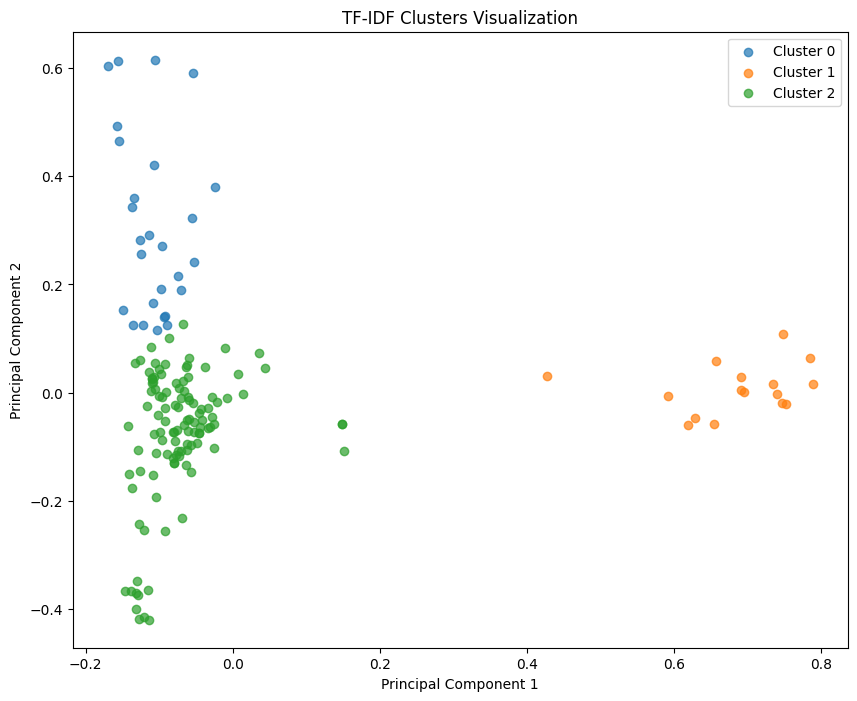

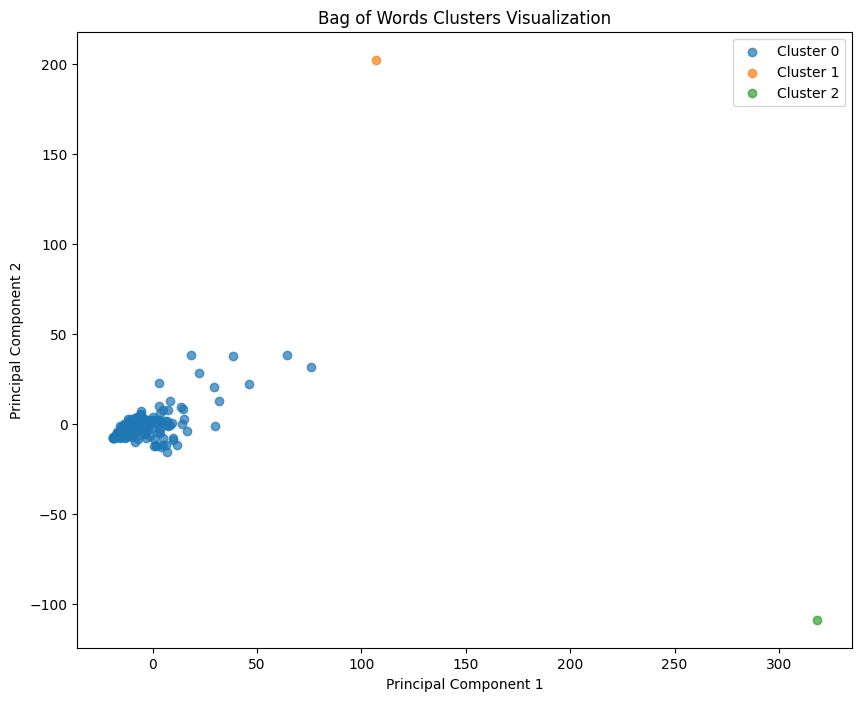

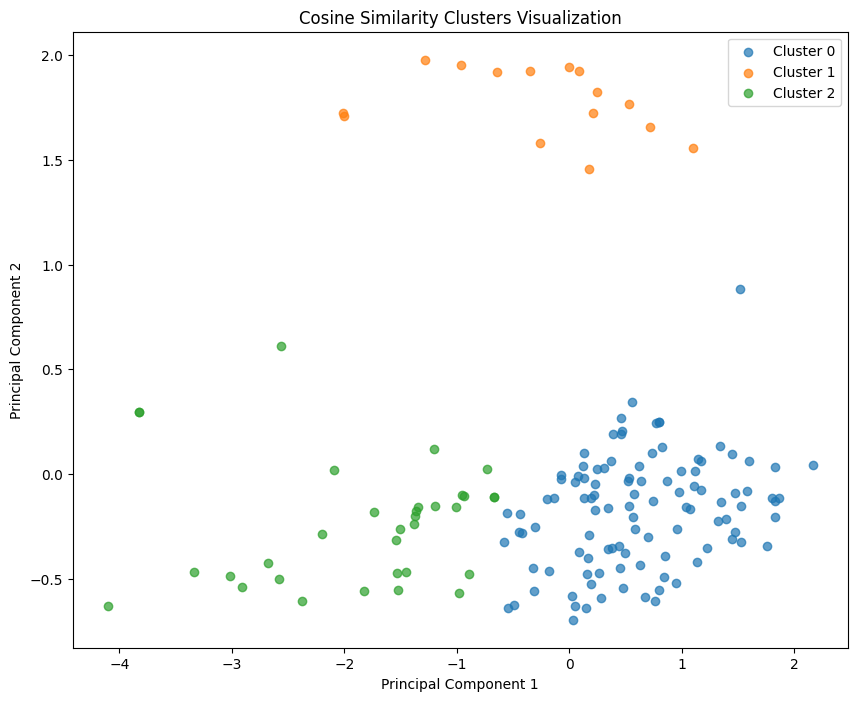

In [343]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset
file_path = "../Data/hasil_preprocessing3.xlsx"
df = pd.read_excel(file_path)

# Assuming the relevant text column is named 'text_berita_clean'
documents = df["clean_ready"]
# Function to perform clustering and evaluation
def perform_clustering(X, num_clusters):
    # Perform clustering using KMeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(X)

    # Get cluster labels for each document
    cluster_labels = kmeans.labels_

    # Evaluate clustering using Silhouette Score
    silhouette_avg = silhouette_score(X, cluster_labels)
    CH = calinski_harabasz_score(X.toarray(), cluster_labels)
    DB = davies_bouldin_score(X.toarray(), cluster_labels)

    return cluster_labels, silhouette_avg, CH, DB

# 1. TF-IDF Vectorization and Clustering
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(documents)
num_clusters = 3  # Set the number of clusters as needed

labels_tfidf, silhouette_tfidf, CH_tfidf, DB_tfidf = perform_clustering(X_tfidf, num_clusters)

print(f'TF-IDF Clustering Performance:\nSilhouette Score: {silhouette_tfidf}\nCalinski-Harabasz Score: {CH_tfidf}\nDavies-Bouldin Score: {DB_tfidf}')

# 2. Bag of Words (BoW) Vectorization and Clustering
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(documents)

labels_bow, silhouette_bow, CH_bow, DB_bow = perform_clustering(X_bow, num_clusters)

print(f'Bag of Words Clustering Performance:\nSilhouette Score: {silhouette_bow}\nCalinski-Harabasz Score: {CH_bow}\nDavies-Bouldin Score: {DB_bow}')

# 3. Cosine Similarity Clustering
cosine_sim_matrix = cosine_similarity(X_bow)

# Perform KMeans clustering on the cosine similarity matrix
kmeans_cosine = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
labels_cosine = kmeans_cosine.fit_predict(cosine_sim_matrix)

# Evaluate performance for Cosine Similarity
silhouette_cosine = silhouette_score(cosine_sim_matrix, labels_cosine)
CH_cosine = calinski_harabasz_score(cosine_sim_matrix, labels_cosine)
DB_cosine = davies_bouldin_score(cosine_sim_matrix, labels_cosine)

print(f'Cosine Similarity Clustering Performance:\nSilhouette Score: {silhouette_cosine}\nCalinski-Harabasz Score: {CH_cosine}\nDavies-Bouldin Score: {DB_cosine}')

# Visualize clusters using PCA (for TF-IDF)
pca_tfidf = PCA(n_components=2).fit_transform(X_tfidf.toarray())
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    plt.scatter(pca_tfidf[labels_tfidf == i][:, 0], pca_tfidf[labels_tfidf == i][:, 1], label=f'Cluster {i}', alpha=0.7)
plt.title('TF-IDF Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Visualize clusters using PCA (for BoW)
pca_bow = PCA(n_components=2).fit_transform(X_bow.toarray())
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    plt.scatter(pca_bow[labels_bow == i][:, 0], pca_bow[labels_bow == i][:, 1], label=f'Cluster {i}', alpha=0.7)
plt.title('Bag of Words Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Visualize clusters using PCA (for Cosine Similarity)
pca_cosine = PCA(n_components=2).fit_transform(cosine_sim_matrix)
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    plt.scatter(pca_cosine[labels_cosine == i][:, 0], pca_cosine[labels_cosine == i][:, 1], label=f'Cluster {i}', alpha=0.7)
plt.title('Cosine Similarity Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

TF-IDF Clustering Performance:
Silhouette Score: 0.06577515299752747
Calinski-Harabasz Score: 7.024733045815408
Davies-Bouldin Score: 3.3075472369970425
Bag of Words Clustering Performance:
Silhouette Score: 0.4988936912850141
Calinski-Harabasz Score: 70.2075804536822
Davies-Bouldin Score: 0.8032791050395076
Cosine Similarity Clustering Performance:
Silhouette Score: 0.2100127993938529
Calinski-Harabasz Score: 58.21736048324473
Davies-Bouldin Score: 1.3852929239435836


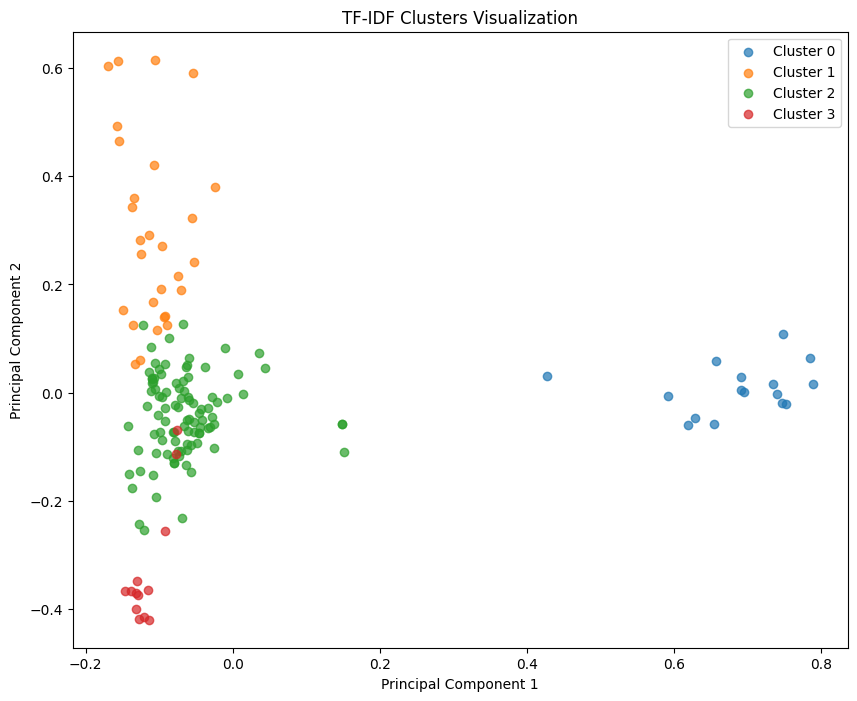

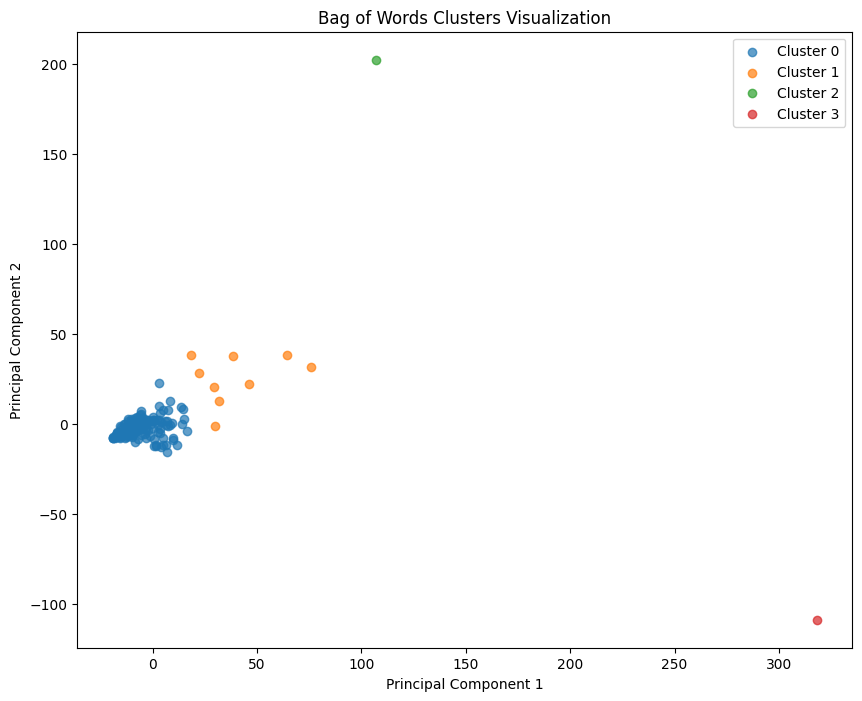

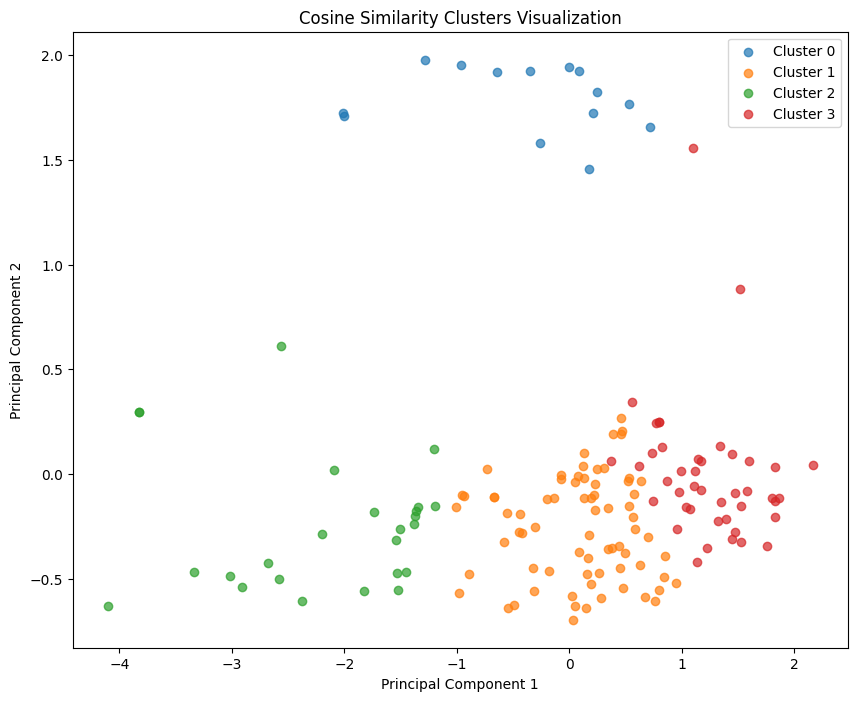

In [344]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset
file_path = "../Data/hasil_preprocessing3.xlsx"
df = pd.read_excel(file_path)

# Assuming the relevant text column is named 'text_berita_clean'
documents = df["clean_ready"]

# Function to perform clustering and evaluation
def perform_clustering(X, num_clusters):
    # Perform clustering using KMeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(X)

    # Get cluster labels for each document
    cluster_labels = kmeans.labels_

    # Evaluate clustering using Silhouette Score
    silhouette_avg = silhouette_score(X, cluster_labels)
    CH = calinski_harabasz_score(X.toarray(), cluster_labels)
    DB = davies_bouldin_score(X.toarray(), cluster_labels)

    return cluster_labels, silhouette_avg, CH, DB

# 1. TF-IDF Vectorization and Clustering
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(documents)
num_clusters = 4  # Set the number of clusters as needed

labels_tfidf, silhouette_tfidf, CH_tfidf, DB_tfidf = perform_clustering(X_tfidf, num_clusters)

print(f'TF-IDF Clustering Performance:\nSilhouette Score: {silhouette_tfidf}\nCalinski-Harabasz Score: {CH_tfidf}\nDavies-Bouldin Score: {DB_tfidf}')

# 2. Bag of Words (BoW) Vectorization and Clustering
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(documents)

labels_bow, silhouette_bow, CH_bow, DB_bow = perform_clustering(X_bow, num_clusters)

print(f'Bag of Words Clustering Performance:\nSilhouette Score: {silhouette_bow}\nCalinski-Harabasz Score: {CH_bow}\nDavies-Bouldin Score: {DB_bow}')

# 3. Cosine Similarity Clustering
cosine_sim_matrix = cosine_similarity(X_bow)

# Perform KMeans clustering on the cosine similarity matrix
kmeans_cosine = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
labels_cosine = kmeans_cosine.fit_predict(cosine_sim_matrix)

# Evaluate performance for Cosine Similarity
silhouette_cosine = silhouette_score(cosine_sim_matrix, labels_cosine)
CH_cosine = calinski_harabasz_score(cosine_sim_matrix, labels_cosine)
DB_cosine = davies_bouldin_score(cosine_sim_matrix, labels_cosine)

print(f'Cosine Similarity Clustering Performance:\nSilhouette Score: {silhouette_cosine}\nCalinski-Harabasz Score: {CH_cosine}\nDavies-Bouldin Score: {DB_cosine}')

# Visualize clusters using PCA (for TF-IDF)
pca_tfidf = PCA(n_components=2).fit_transform(X_tfidf.toarray())
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    plt.scatter(pca_tfidf[labels_tfidf == i][:, 0], pca_tfidf[labels_tfidf == i][:, 1], label=f'Cluster {i}', alpha=0.7)
plt.title('TF-IDF Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Visualize clusters using PCA (for BoW)
pca_bow = PCA(n_components=2).fit_transform(X_bow.toarray())
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    plt.scatter(pca_bow[labels_bow == i][:, 0], pca_bow[labels_bow == i][:, 1], label=f'Cluster {i}', alpha=0.7)
plt.title('Bag of Words Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Visualize clusters using PCA (for Cosine Similarity)
pca_cosine = PCA(n_components=2).fit_transform(cosine_sim_matrix)
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    plt.scatter(pca_cosine[labels_cosine == i][:, 0], pca_cosine[labels_cosine == i][:, 1], label=f'Cluster {i}', alpha=0.7)
plt.title('Cosine Similarity Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Import Libraries

This block imports all the necessary libraries required for data manipulation, clustering, evaluation, and visualization



In [345]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from collections import Counter

# 2. Load the Dataset

This block loads the dataset from an Excel file and prepares the relevant text data for processing.

In [346]:
# Load the dataset
file_path = "../Data/hasil_preprocessing3.xlsx"
df = pd.read_excel(file_path)

# Assuming the relevant text column is named 'text_berita_clean'
documents = df["clean_ready"]

# 3. Define Clustering and Evaluation Functions

This block defines functions to perform clustering using KMeans and evaluate the clustering performance based on various metrics.

In [347]:
# Function to perform clustering and evaluation
def perform_clustering(X, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(X)

    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    CH = calinski_harabasz_score(X.toarray(), cluster_labels)
    DB = davies_bouldin_score(X.toarray(), cluster_labels)

    return cluster_labels, silhouette_avg, CH, DB

def get_top_terms(vectorizer, kmeans_model, n_terms=10):
    """Get the top n terms for each cluster."""
    terms = vectorizer.get_feature_names_out()  # Mendapatkan istilah dari vektorizer
    order_centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1]  # Mengurutkan pusat cluster

    top_terms = {}
    for i in range(len(order_centroids)):
        top_terms[i] = [terms[ind] for ind in order_centroids[i, :n_terms] if ind < len(terms)]  # Memastikan indeks tidak keluar batas

    return top_terms


# Function to count documents in each cluster
def count_documents_per_cluster(cluster_labels):
    return Counter(cluster_labels)

# 4. Determine Optimal Number of Clusters with Silhoutte Score (TFIDF Only)
This block uses the Elbow Method or Silhouette Score analysis to help determine the optimal number of clusters with Silhoutte Score

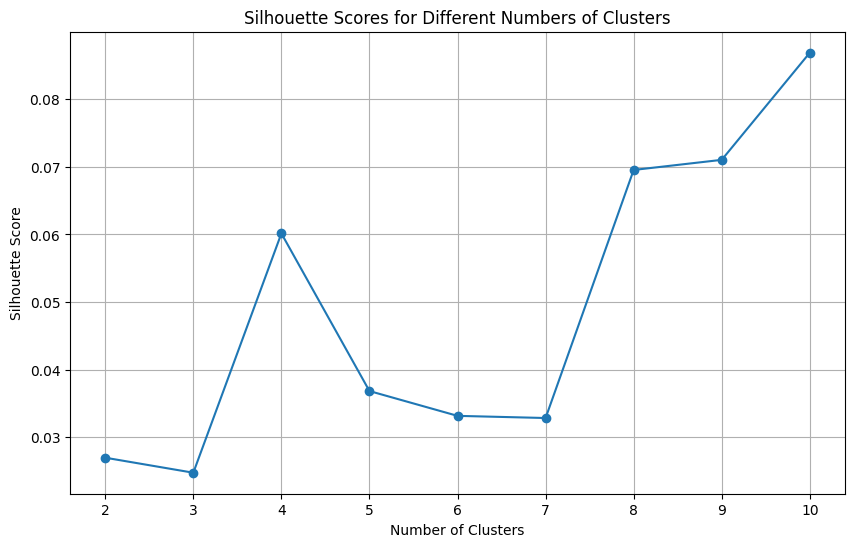

In [348]:
# Determine optimal number of clusters using Elbow Method or Silhouette Score
def find_optimal_clusters(X):
    silhouette_scores = []
    K_range = range(2, 11)  # Test for clusters from 2 to 10

    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, labels)
        silhouette_scores.append(silhouette_avg)

    plt.figure(figsize=(10, 6))
    plt.plot(K_range, silhouette_scores, marker='o')
    plt.title('Silhouette Scores for Different Numbers of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.xticks(K_range)
    plt.grid()
    plt.show()

# Call this function with TF-IDF matrix to find optimal clusters
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(documents)
find_optimal_clusters(X_tfidf)  # This will plot the silhouette scores for different cluster numbers

# 5. TF-IDF Vectorization and Clustering

This block performs TF-IDF vectorization on the documents and applies KMeans clustering.

In [ ]:
# 1. TF-IDF Vectorization and Clustering
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(documents)

bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(documents)
num_clusters = 3  # Set the number of clusters as needed

labels_tfidf, silhouette_tfidf, CH_tfidf, DB_tfidf = perform_clustering(X_tfidf, num_clusters)

print(f'TF-IDF Clustering Performance:\nSilhouette Score: {silhouette_tfidf}\nCalinski-Harabasz Score: {CH_tfidf}\nDavies-Bouldin Score: {DB_tfidf}')

# Get top terms for TF-IDF clusters
top_terms_tfidf = get_top_terms(tfidf_vectorizer, KMeans(n_clusters=num_clusters).fit(X_tfidf))
print("\nTop terms in each TF-IDF cluster:")
for i, terms in top_terms_tfidf.items():
    print(f"Cluster {i}: {', '.join(terms)}")

# Count documents in each TF-IDF cluster
doc_count_tfidf = count_documents_per_cluster(labels_tfidf)
print("\nJumlah dokumen di tiap TF-IDF cluster:")
for label, count in doc_count_tfidf.items():
    print(f"Cluster {label}: {count} instances")

TF-IDF Clustering Performance:
Silhouette Score: 0.08792692319510605
Calinski-Harabasz Score: 4.54692227070889
Davies-Bouldin Score: 3.122596781841689

Top terms in each TF-IDF cluster:
Cluster 0: hours, that, from, system, with, clients, indonesia, business, taxation, said
Cluster 1: klik, sedikit, iklan, sini, berita, baca, pajak, industri, risiko, tempo
Cluster 2: pajak, coretax, sistem, system, wajib, kendala, jenderal, komisi, terima, direktorat
Cluster 3: hukum, periksa, kini, platform, integrasi, usaha, pajak, coretax, mulyani, undang
Cluster 4: pajak, sistem, coretax, data, paja, wajib, aman, jadi, lebih, tingkat
Cluster 5: faktur, pajak, buat, status, wajib, sertifikat, coretax, hasil, baik, kode
Cluster 6: korupsi, iwpi, duga, pajak, aplikasi, coretax, rinto, lapor, proyek, komisi
Cluster 7: pajak, terima, coretax, sistem, negara, triliun, paja, sebut, wajib, masalah
Cluster 8: pajak, terima, turun, anggito, faktor, negara, perintah, papua, coretax, masalah
Cluster 9: pajak, 

# 6. Bag of Words (BoW) Vectorization and Clustering

This block performs Bag of Words vectorization on the documents and applies KMeans clustering.

In [350]:
# 2. Bag of Words (BoW) Vectorization and Clustering
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(documents)

labels_bow, silhouette_bow, CH_bow, DB_bow = perform_clustering(X_bow, num_clusters)

print(f'Bag of Words Clustering Performance:\nSilhouette Score: {silhouette_bow}\nCalinski-Harabasz Score: {CH_bow}\nDavies-Bouldin Score: {DB_bow}')

# Get top terms for BoW clusters
top_terms_bow = get_top_terms(bow_vectorizer, KMeans(n_clusters=num_clusters).fit(X_bow))
print("\nTop terms in each BoW cluster:")
for i, terms in top_terms_bow.items():
    print(f"Cluster {i}: {', '.join(terms)}")

# Count documents in each BoW cluster
doc_count_bow = count_documents_per_cluster(labels_bow)
print("\nJumlah dokumen di tiap BoW cluster:")
for label, count in doc_count_bow.items():
    print(f"Cluster {label}: {count} instances")

Bag of Words Clustering Performance:
Silhouette Score: 0.2044786167483189
Calinski-Harabasz Score: 43.64371340309873
Davies-Bouldin Score: 1.2192561558278163

Top terms in each BoW cluster:
Cluster 0: pajak, masa, faktur, coretax, maret, detik, potong, januari, bukti, februari
Cluster 1: faktur, pajak, lalu, jumlah, jadi, hasil, buat, menit, coretax, unggah
Cluster 2: sistem, coretax, data, paja, jadi, masalah, pajak, perlu, aman, terap
Cluster 3: sistem, pajak, coretax, data, paja, wajib, aman, guna, tingkat, jadi
Cluster 4: pajak, coretax, sistem, terima, wajib, paja, jadi, laku, sebut, hukum
Cluster 5: pajak, sistem, wajib, coretax, laku, layan, usaha, guna, kata, data
Cluster 6: pajak, tahun, coretax, besar, buat, data, anggar, sistem, wajib, paja
Cluster 7: pajak, klik, sini, berita, baca, sedikit, iklan, coretax, sistem, kata
Cluster 8: pajak, coretax, wajib, sistem, paja, jadi, laku, baik, data, guna
Cluster 9: pajak, coretax, wajib, gagal, sedikit, data, beberapa, daftar, klik,

# 7. Cosine Similarity Clustering

This block calculates cosine similarity from the BoW representation and performs KMeans clustering.

In [351]:
# 3. Cosine Similarity Clustering
cosine_sim_matrix = cosine_similarity(X_bow)

# Perform KMeans clustering on the cosine similarity matrix
kmeans_cosine = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
labels_cosine = kmeans_cosine.fit_predict(cosine_sim_matrix)

# Evaluate performance for Cosine Similarity
silhouette_cosine = silhouette_score(cosine_sim_matrix, labels_cosine)
CH_cosine = calinski_harabasz_score(cosine_sim_matrix, labels_cosine)
DB_cosine = davies_bouldin_score(cosine_sim_matrix, labels_cosine)

print(f'Cosine Similarity Clustering Performance:\nSilhouette Score: {silhouette_cosine}\nCalinski-Harabasz Score: {CH_cosine}\nDavies-Bouldin Score: {DB_cosine}')

# Get top terms for Cosine clusters (using BoW vectorization)
top_terms_cosine = get_top_terms(bow_vectorizer, kmeans_cosine)
print("\nTop terms in each Cosine Similarity cluster:")
for i, terms in top_terms_cosine.items():
    print(f"Cluster {i}: {', '.join(terms)}")

# Count documents in each Cosine Similarity cluster
doc_count_cosine = count_documents_per_cluster(labels_cosine)
print("\nJumlah dokumen di tiap Cosine Similarity cluster:")
for label, count in doc_count_cosine.items():
    print(f"Cluster {label}: {count} instances")

Cosine Similarity Clustering Performance:
Silhouette Score: 0.20004431020957897
Calinski-Harabasz Score: 39.085519931436416
Davies-Bouldin Score: 1.4830466037615386

Top terms in each Cosine Similarity cluster:
Cluster 0: acu, alas, adil, alih, alias, adaptasi, accident, aset, aman, adu
Cluster 1: area, advokasi, anthony, accident, aksesibilitas, ada, asal, arif, adhyasta, almarhum
Cluster 2: application, asa, apresiasi, arabia, approve, asep, aprindo, applications, apindo, aplikasi
Cluster 3: accident, address, akhir, area, almarhum, ageng, agrifood, asal, ambisius, angkat
Cluster 4: aku, akuntabel, aktual, aktivasi, akuntabilitas, akurat, akumulasi, akun, akurasi, aktivitas
Cluster 5: area, advokasi, accident, almarhum, aksesibilitas, ada, adhyasta, anthony, ambil, asal
Cluster 6: apa, antisipasi, antar, ancam, arifin, antara, arah, angka, approve, asep
Cluster 7: accident, ageng, akhir, agrifood, adu, analisis, address, almarhum, amanat, asal
Cluster 8: aplikasi, applicable, accept,

In [352]:
# 3. Cosine Similarity Clustering
cosine_sim_matrix = cosine_similarity(X_tfidf)

# Perform KMeans clustering on the cosine similarity matrix
kmeans_cosine = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
labels_cosine = kmeans_cosine.fit_predict(cosine_sim_matrix)

# Evaluate performance for Cosine Similarity
silhouette_cosine = silhouette_score(cosine_sim_matrix, labels_cosine)
CH_cosine = calinski_harabasz_score(cosine_sim_matrix, labels_cosine)
DB_cosine = davies_bouldin_score(cosine_sim_matrix, labels_cosine)

print(f'Cosine Similarity Clustering Performance:\nSilhouette Score: {silhouette_cosine}\nCalinski-Harabasz Score: {CH_cosine}\nDavies-Bouldin Score: {DB_cosine}')

# Get top terms for Cosine clusters (using BoW vectorization)
top_terms_cosine = get_top_terms(bow_vectorizer, kmeans_cosine)
print("\nTop terms in each Cosine Similarity cluster:")
for i, terms in top_terms_cosine.items():
    print(f"Cluster {i}: {', '.join(terms)}")

# Count documents in each Cosine Similarity cluster
doc_count_cosine = count_documents_per_cluster(labels_cosine)
print("\nJumlah dokumen di tiap Cosine Similarity cluster:")
for label, count in doc_count_cosine.items():
    print(f"Cluster {label}: {count} instances")

Cosine Similarity Clustering Performance:
Silhouette Score: 0.19537383819064988
Calinski-Harabasz Score: 22.703343170967578
Davies-Bouldin Score: 1.8594934401203758

Top terms in each Cosine Similarity cluster:
Cluster 0: acu, alias, alih, alas, adaptasi, adil, aset, accident, aman, adu
Cluster 1: application, apresiasi, arabia, aplikasi, apindo, asa, applicable, approve, applications, accept
Cluster 2: akuntabel, akurat, aktual, aku, akuntabilitas, akumulasi, aktivasi, akun, akurasi, aktivitas
Cluster 3: akar, agree, anggap, about, ageng, adu, abang, address, advertisement, almarhum
Cluster 4: area, accident, antar, agrifood, advokasi, accordance, address, anthony, almarhum, asal
Cluster 5: asia, abimanyu, akademi, advertisement, actions, airlangga, adik, adopsi, adu, abang
Cluster 6: alokasi, alat, administrasi, arti, akibat, akurasi, ada, acceptance, adu, agrifood
Cluster 7: area, accident, anthony, almarhum, advokasi, address, agrifood, akademisi, aksesibilitas, akhir
Cluster 8: ak

# Optimal Clustering dengan KMeans + TFIDF, Bow, Cosine (WCSS Method)

Number of NaN values: 0


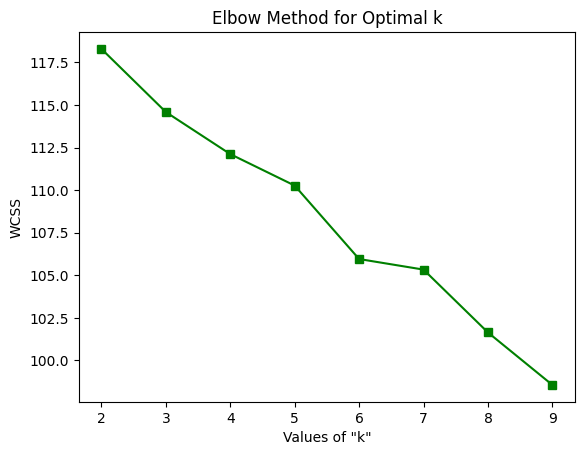

In [353]:
# Importing necessary libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Load the dataset
file_path = "../Data/hasil_preprocessing3.xlsx"
df = pd.read_excel(file_path)

# Assuming the relevant text column is named 'text_berita_clean'
documents = df["clean_ready"]

# Check for NaN values in the documents
print("Number of NaN values:", documents.isnull().sum())

# Handle NaN values by dropping them or filling with an empty string
documents = documents.dropna()  # Option 1: Drop NaN values
# documents = documents.fillna('')  # Option 2: Fill NaN with an empty string

# Convert the text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features if needed
X = vectorizer.fit_transform(documents).toarray()

# Determining the maximum number of clusters using a simple method
limit = int((X.shape[0] // 2) ** 0.5)

# Selecting the optimal value of 'k' using the elbow method
wcss = {}
for k in range(2, 10):
    model = KMeans(n_clusters=k)
    model.fit(X)
    wcss[k] = model.inertia_

# Plotting the WCSS values to find the elbow point
plt.plot(list(wcss.keys()), list(wcss.values()), 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

Number of NaN values: 0


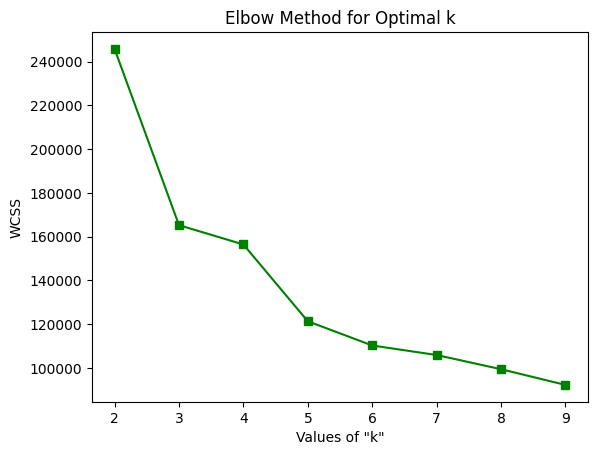

In [354]:
# Importing necessary libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Load the dataset
file_path = "../Data/hasil_preprocessing3.xlsx"
df = pd.read_excel(file_path)

# Assuming the relevant text column is named 'text_berita_clean'
documents = df["clean_ready"]
# Check for NaN values in the documents
print("Number of NaN values:", documents.isnull().sum())

# Handle NaN values by dropping them or filling with an empty string
documents = documents.dropna()  # Option 1: Drop NaN values
# documents = documents.fillna('')  # Option 2: Fill NaN with an empty string

# Convert the text data to Bag-of-Words features
vectorizer = CountVectorizer(max_features=1000)  # Adjust max_features if needed
X = vectorizer.fit_transform(documents).toarray()

# Determining the maximum number of clusters using a simple method
limit = int((X.shape[0] // 2) ** 0.5)

# Selecting the optimal value of 'k' using the elbow method
wcss = {}
for k in range(2, 10):
    model = KMeans(n_clusters=k)
    model.fit(X)
    wcss[k] = model.inertia_


# Plotting the WCSS values to find the elbow point
plt.plot(list(wcss.keys()), list(wcss.values()), 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

Number of NaN values: 0


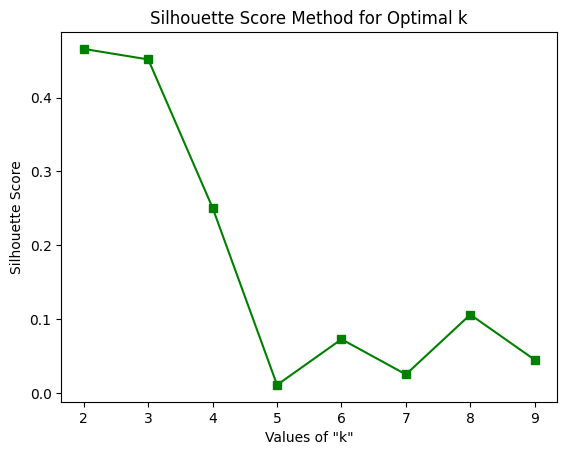

The optimal number of clusters based on silhouette score is: 2


In [355]:
# Importing necessary libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Load the dataset
file_path = "../Data/hasil_preprocessing3.xlsx"
df = pd.read_excel(file_path)

# Assuming the relevant text column is named 'text_berita_clean'
documents = df["clean_ready"]

# Check for NaN values in the documents
print("Number of NaN values:", documents.isnull().sum())

# Handle NaN values by dropping them or filling with an empty string
documents = documents.dropna()  # Option 1: Drop NaN values
# documents = documents.fillna('')  # Option 2: Fill NaN with an empty string

# Convert the text data to Bag of Words (BOW) features
vectorizer = CountVectorizer(max_features=1000)  # Adjust max_features if needed
X = vectorizer.fit_transform(documents)

# Calculate cosine similarity matrix
cosine_sim = cosine_similarity(X)

# Determine optimal k using silhouette score
limit = int((X.shape[0] // 2) ** 0.5)
silhouette_scores = []

for k in range(2, 10):
    model = KMeans(n_clusters=k)
    labels = model.fit_predict(cosine_sim)
    silhouette_avg = silhouette_score(cosine_sim, labels, metric="cosine")
    silhouette_scores.append((k, silhouette_avg))

# Extracting the optimal k value based on the maximum silhouette score
optimal_k = max(silhouette_scores, key=lambda x: x[1])[0]

# Plotting silhouette scores to find the optimal number of clusters
plt.plot([k for k, _ in silhouette_scores], [score for _, score in silhouette_scores], 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method for Optimal k')
plt.show()

print(f"The optimal number of clusters based on silhouette score is: {optimal_k}")

# 8. Visualization of Clusters Based On WCSS Method

This block visualizes the clusters formed by TF-IDF, BoW, and cosine similarity using PCA.

TF-IDF Clustering Performance:
Silhouette Score: 0.08792692319510605
Calinski-Harabasz Score: 4.54692227070889
Davies-Bouldin Score: 3.122596781841689
Bag of Words Clustering Performance:
Silhouette Score: 0.2044786167483189
Calinski-Harabasz Score: 43.64371340309873
Davies-Bouldin Score: 1.2192561558278163
Cosine Similarity Clustering Performance:
Silhouette Score: 0.20004431020957897
Calinski-Harabasz Score: 39.085519931436416
Davies-Bouldin Score: 1.4830466037615386


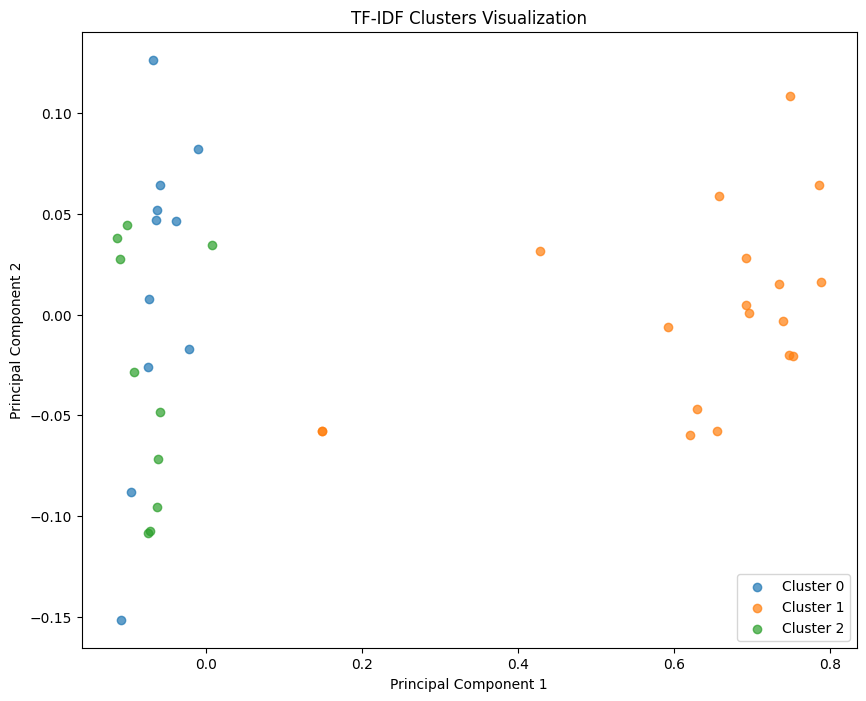

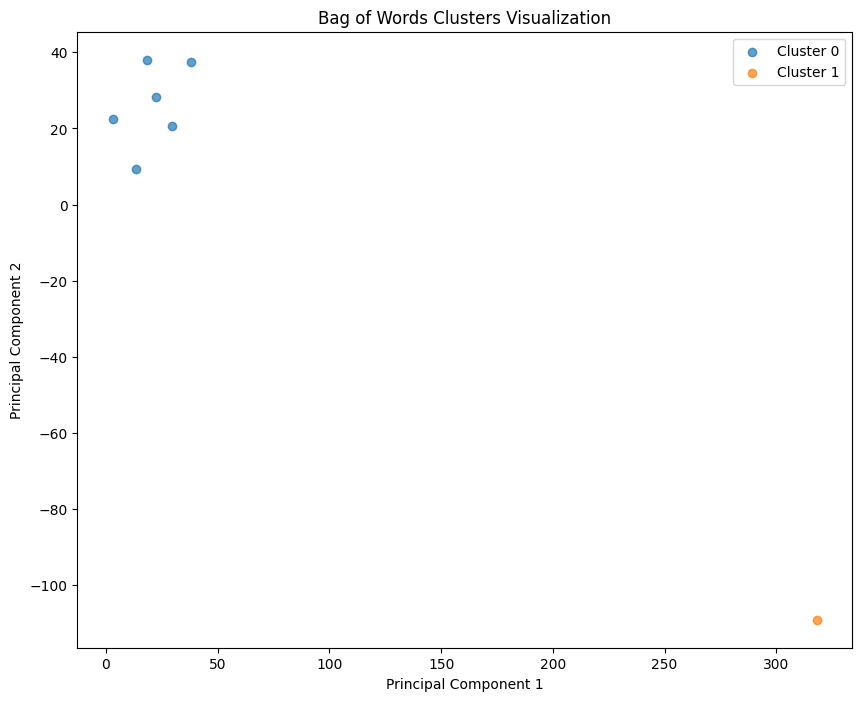

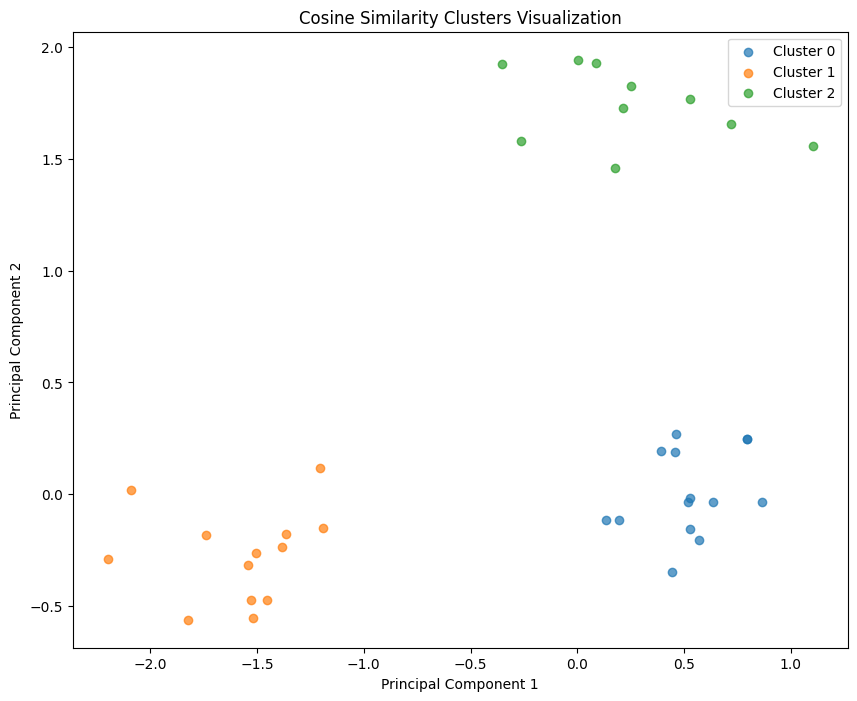

In [356]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset
file_path = "../Data/hasil_preprocessing3.xlsx"
df = pd.read_excel(file_path)

# Assuming the relevant text column is named 'text_berita_clean'
documents = df["clean_ready"]

# Function to perform clustering and evaluation
def perform_clustering(X, num_clusters):
    # Perform clustering using KMeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(X)

    # Get cluster labels for each document
    cluster_labels = kmeans.labels_

    # Evaluate clustering using Silhouette Score
    silhouette_avg = silhouette_score(X, cluster_labels)
    CH = calinski_harabasz_score(X.toarray(), cluster_labels)
    DB = davies_bouldin_score(X.toarray(), cluster_labels)

    return cluster_labels, silhouette_avg, CH, DB

# 1. TF-IDF Vectorization and Clustering
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(documents)


labels_tfidf, silhouette_tfidf, CH_tfidf, DB_tfidf = perform_clustering(X_tfidf, num_clusters)

print(f'TF-IDF Clustering Performance:\nSilhouette Score: {silhouette_tfidf}\nCalinski-Harabasz Score: {CH_tfidf}\nDavies-Bouldin Score: {DB_tfidf}')

# 2. Bag of Words (BoW) Vectorization and Clustering
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(documents)

labels_bow, silhouette_bow, CH_bow, DB_bow = perform_clustering(X_bow, num_clusters)

print(f'Bag of Words Clustering Performance:\nSilhouette Score: {silhouette_bow}\nCalinski-Harabasz Score: {CH_bow}\nDavies-Bouldin Score: {DB_bow}')

# 3. Cosine Similarity Clustering
cosine_sim_matrix = cosine_similarity(X_bow)

# Perform KMeans clustering on the cosine similarity matrix
kmeans_cosine = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
labels_cosine = kmeans_cosine.fit_predict(cosine_sim_matrix)

# Evaluate performance for Cosine Similarity
silhouette_cosine = silhouette_score(cosine_sim_matrix, labels_cosine)
CH_cosine = calinski_harabasz_score(cosine_sim_matrix, labels_cosine)
DB_cosine = davies_bouldin_score(cosine_sim_matrix, labels_cosine)

print(f'Cosine Similarity Clustering Performance:\nSilhouette Score: {silhouette_cosine}\nCalinski-Harabasz Score: {CH_cosine}\nDavies-Bouldin Score: {DB_cosine}')

# Visualize clusters using PCA (for TF-IDF)
pca_tfidf = PCA(n_components=2).fit_transform(X_tfidf.toarray())
plt.figure(figsize=(10, 8))
for i in range(3):
    plt.scatter(pca_tfidf[labels_tfidf == i][:, 0], pca_tfidf[labels_tfidf == i][:, 1], label=f'Cluster {i}', alpha=0.7)
plt.title('TF-IDF Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Visualize clusters using PCA (for BoW)
pca_bow = PCA(n_components=3).fit_transform(X_bow.toarray())
plt.figure(figsize=(10, 8))
for i in range(2):
    plt.scatter(pca_bow[labels_bow == i][:, 0], pca_bow[labels_bow == i][:, 1], label=f'Cluster {i}', alpha=0.7)
plt.title('Bag of Words Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Visualize clusters using PCA (for Cosine Similarity)
pca_cosine = PCA(n_components=2).fit_transform(cosine_sim_matrix)
plt.figure(figsize=(10, 8))
for i in range(3):
    plt.scatter(pca_cosine[labels_cosine == i][:, 0], pca_cosine[labels_cosine == i][:, 1], label=f'Cluster {i}', alpha=0.7)
plt.title('Cosine Similarity Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# 9. Analisis Sentimen



                                         clean_ready  sentiment_textblob
0  direktur jenderal pajak suryo utomo ungkap kab...            0.000000
1  rata ada bawah detik performa baik catat detik...            0.000000
2  ditjen pajak nilai performa coretax administra...            0.000000
3  akhir marak tipu mengatasnamakan implementasi ...            0.056566
4  direktur jenderal dirjen pajak menteri uang su...           -0.025000


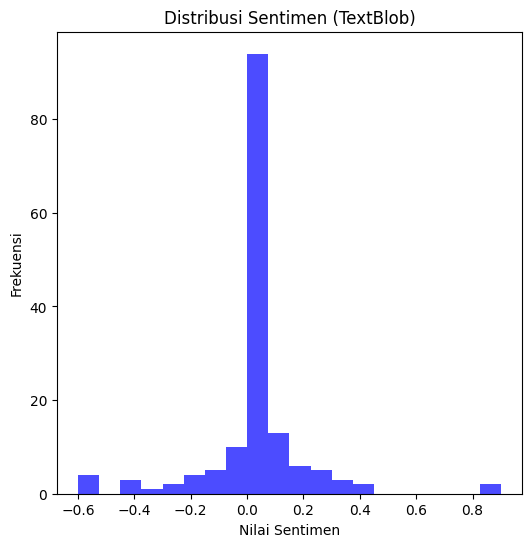

In [357]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Fungsi untuk analisis sentimen menggunakan TextBlob
def analyze_sentiment_textblob(text):
    analysis = TextBlob(text)
    # Menggunakan polarity untuk menentukan sentimen
    return analysis.sentiment.polarity  # Nilai antara -1 (negatif) dan 1 (positif)

# Terapkan analisis sentimen menggunakan TextBlob
df["sentiment_textblob"] = df["clean_ready"].apply(analyze_sentiment_textblob)

# Tampilkan hasil analisis sentimen
print(df[['clean_ready', 'sentiment_textblob']].head())

# Visualisasi hasil analisis sentimen
plt.figure(figsize=(6, 6))

# Histogram untuk sentimen TextBlob
plt.hist(df['sentiment_textblob'], bins=20, color='blue', alpha=0.7)
plt.title('Distribusi Sentimen (TextBlob)')
plt.xlabel('Nilai Sentimen')
plt.ylabel('Frekuensi')

plt.show()

Hasil Kategorisasi Sentimen (TextBlob):
sentiment_category_textblob
Netral     84
Positif    41
Negatif    29
Name: count, dtype: int64


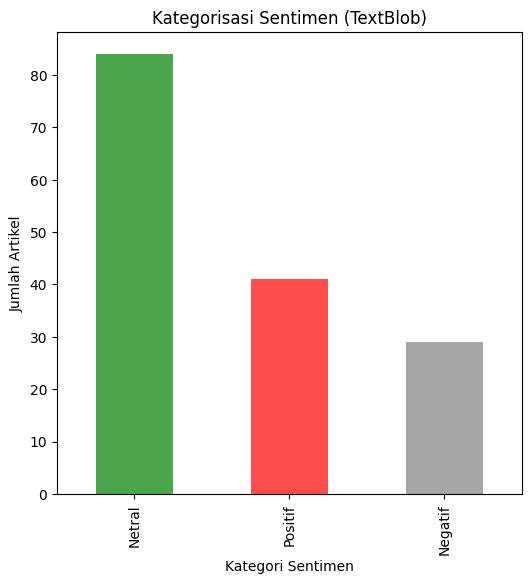

In [358]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Fungsi untuk analisis sentimen menggunakan TextBlob
def analyze_sentiment_textblob(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Nilai antara -1 (negatif) dan 1 (positif)

# Kategorikan sentimen berdasarkan nilai polaritas
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positif'
    elif polarity < 0:
        return 'Negatif'
    else:
        return 'Netral'

# Terapkan analisis sentimen menggunakan TextBlob
df['sentiment_textblob'] = df['clean_ready'].apply(analyze_sentiment_textblob)

# Terapkan kategori sentimen untuk TextBlob
df['sentiment_category_textblob'] = df['sentiment_textblob'].apply(categorize_sentiment)

# Hitung jumlah artikel berdasarkan kategori sentimen
sentiment_counts_textblob = df['sentiment_category_textblob'].value_counts()

# Tampilkan hasil
print("Hasil Kategorisasi Sentimen (TextBlob):")
print(sentiment_counts_textblob)

# Visualisasi hasil kategorisasi sentimen
plt.figure(figsize=(6, 6))

# Bar plot untuk hasil TextBlob
sentiment_counts_textblob.plot(kind='bar', color=['green', 'red', 'gray'], alpha=0.7)
plt.title('Kategorisasi Sentimen (TextBlob)')
plt.xlabel('Kategori Sentimen')
plt.ylabel('Jumlah Artikel')

plt.show()


In [359]:
df

,NO,SUMBER,PENERBIT,LINK,JUDUL,content,tags,date,status,clean_text,content_clean,tokens,stopword_removal,stemming_output,rareword_removed,date_final,clean_ready,sentiment_textblob,sentiment_category_textblob
0,2,economic,Detik,https://finance.detik.com/berita-ekonomi-bisni...,dirjen pajak ungkap kabar terbaru soal perbaik...,direktur jenderal (dirjen) pajak suryo utomo m...,"coretax,dirjen pajak,administrasi perpajakan,f...",Tidak ada tanggal,success,direktur jenderal pajak suryo utomo mengungka...,direktur jenderal pajak suryo utomo mengungkap...,"['direktur', 'jenderal', 'pajak', 'suryo', 'ut...","['direktur', 'jenderal', 'pajak', 'suryo', 'ut...","['direktur', 'jenderal', 'pajak', 'suryo', 'ut...","['direktur', 'jenderal', 'pajak', 'suryo', 'ut...",Tidak ada tanggal,direktur jenderal pajak suryo utomo ungkap kab...,0.000000,Netral
1,3,economic,Detik,https://finance.detik.com/berita-ekonomi-bisni...,djp klaim aplikasi coretax mulai stabil digunakan,direktorat jenderal pajak (djp) kementerian ke...,"coretax,djp,aplikasi perpajakan,pembaruan,ppnb...",25 Maret 2025,success,"rata berada di bawah , detik, dengan performa ...",rata berada di bawah detik dengan performa ter...,"['rata', 'berada', 'di', 'bawah', 'detik', 'de...","['rata', 'berada', 'bawah', 'detik', 'performa...","['rata', 'ada', 'bawah', 'detik', 'performa', ...","['rata', 'ada', 'bawah', 'detik', 'performa', ...",25-03-2025,rata ada bawah detik performa baik catat detik...,0.000000,Netral
2,5,local news,DDTC,https://news.ddtc.co.id/berita/nasional/181042...,"latensi turun, djp klaim coretax system sudah ...","ilustrasi. jakarta, ddtcnews - ditjen pajak (d...","administrasi pajak, coretax, coretax system, djp",30 April 2025,success,ditjen pajak menilai performa coretax adminis...,ditjen pajak menilai performa coretax administ...,"['ditjen', 'pajak', 'menilai', 'performa', 'co...","['ditjen', 'pajak', 'menilai', 'performa', 'co...","['ditjen', 'pajak', 'nilai', 'performa', 'core...","['ditjen', 'pajak', 'nilai', 'performa', 'core...",30-04-2025,ditjen pajak nilai performa coretax administra...,0.000000,Netral
3,6,economic,Detik,https://finance.detik.com/berita-ekonomi-bisni...,awas penipuan catut nama coretax! begini modus...,ditjen pajak (djp) kementerian keuangan (kemen...,"penipuan,coretax,ditjen pajak,catut nama coret...",Tidak ada tanggal,success,akhir ini marak penipuan yang mengatasnamakan ...,akhir ini marak penipuan yang mengatasnamakan ...,"['akhir', 'ini', 'marak', 'penipuan', 'yang', ...","['akhir', 'marak', 'penipuan', 'mengatasnamaka...","['akhir', 'marak', 'tipu', 'mengatasnamakan', ...","['akhir', 'marak', 'tipu', 'mengatasnamakan', ...",Tidak ada tanggal,akhir marak tipu mengatasnamakan implementasi ...,0.056566,Positif
4,7,local news,Tempo,https://www.tempo.co/ekonomi/hari-ini-direktor...,hari ini direktorat jenderal pajak rapat tertu...,scroll ke bawah untuk membaca berita baca be...,tidak ada tags,1 Januari 2025,success,direktur jenderal atau dirjen pajak kementeria...,direktur jenderal atau dirjen pajak kementeria...,"['direktur', 'jenderal', 'atau', 'dirjen', 'pa...","['direktur', 'jenderal', 'dirjen', 'pajak', 'k...","['direktur', 'jenderal', 'dirjen', 'pajak', 'm...","['direktur', 'jenderal', 'dirjen', 'pajak', 'm...",01-01-2025,direktur jenderal dirjen pajak menteri uang su...,-0.025000,Negatif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,155,local news,CNBC,https://www.cnbcindonesia.com/news/20250114071...,keluhan soal coretax terus muncul: sistem tak ...,"jakarta, cnbc indonesia - kalangan pengusaha d...","coretax, pajak, djp",1 Januari 2025,success,kalangan pengusaha dan pakar pajak memberikan ...,kalangan pengusaha dan pakar pajak memberikan ...,"['kalangan', 'pengusaha', 'dan', 'pakar', 'paj...","['kalangan', 'pengusaha', 'pakar', 'pajak', 'm...","['kalang', 'usaha', 'pakar', 'pajak', 'beri', ...","['kalang', 'usaha', 'pakar', 'pajak', 'beri', ...",01-01-2025,kalang usaha pakar pajak beri catat khu

In [360]:
print(df.columns)

Index(['NO', 'SUMBER', 'PENERBIT', 'LINK', 'JUDUL', 'content', 'tags', 'date',
       'status', 'clean_text', 'content_clean', 'tokens', 'stopword_removal',
       'stemming_output', 'rareword_removed', 'date_final', 'clean_ready',
       'sentiment_textblob', 'sentiment_category_textblob'],
      dtype='object')


date_final
2020-12-02    1
2024-01-02    1
2024-02-10    1
2024-10-14    1
2024-11-21    1
             ..
2025-04-24    2
2025-04-28    1
2025-04-30    1
2025-05-02    1
2025-05-06    3
Length: 61, dtype: int64


/var/folders/q5/51391s5s49lfnf75nqsbgnhr0000gn/T/ipykernel_19336/4075972652.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["date_final"] = pd.to_datetime(df["date_final"].str.strip(), errors="coerce")
/var/folders/q5/51391s5s49lfnf75nqsbgnhr0000gn/T/ipykernel_19336/4075972652.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date_final"] = pd.to_datetime(df["date_final"].str.strip(), errors="coerce")


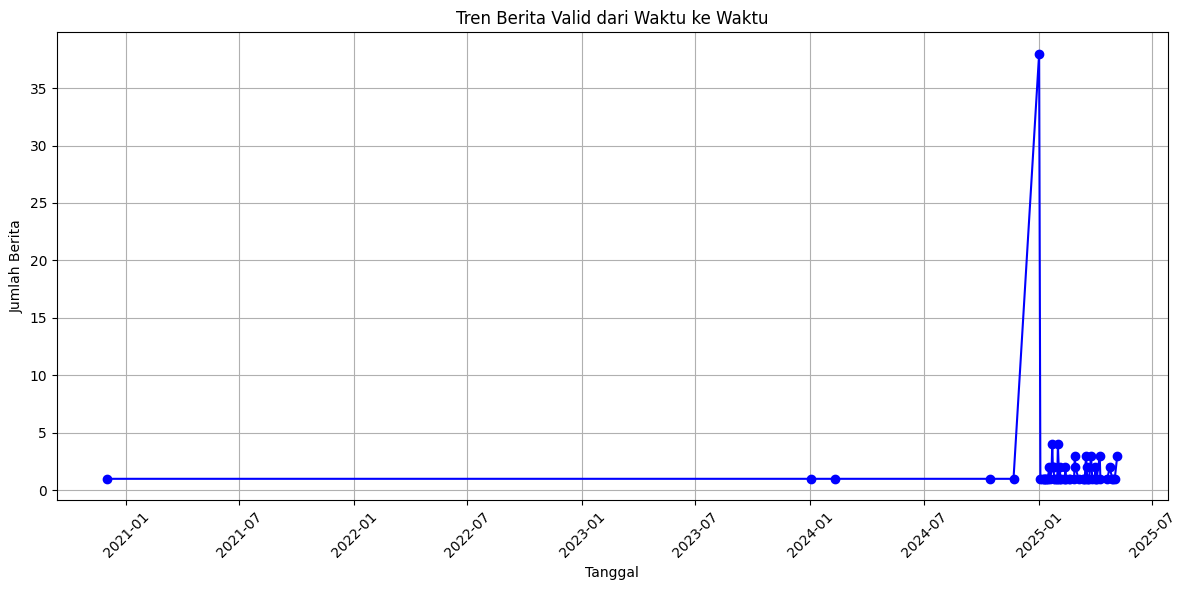

In [361]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# 1. Hapus entri 'Tidak ada tanggal'
df = df[df["date_final"].str.lower() != "tidak ada tanggal"]

# 2. Strip spasi dan konversi ke datetime, drop yang gagal
df["date_final"] = pd.to_datetime(df["date_final"].str.strip(), errors="coerce")
df = df[df["date_final"].notna()]

# 3. Filter hanya tanggal yang tidak melebihi hari ini
today = pd.Timestamp(datetime.today().date())
df = df[df["date_final"] <= today]

# 4. Hitung tren berdasarkan tanggal
trends = df.groupby("date_final").size()

# 5. Tampilkan tren
print(trends)

# 6. Visualisasi
plt.figure(figsize=(12, 6))
plt.plot(trends.index, trends.values, marker="o", linestyle="-", color="blue")
plt.title("Tren Berita Valid dari Waktu ke Waktu")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Berita")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

date_final
2020-12-02    0.136126
2024-01-02    0.000000
2024-02-10    0.000000
2024-10-14    0.000000
2024-11-21    0.000000
                ...   
2025-04-24    0.000000
2025-04-28    0.033333
2025-04-30    0.000000
2025-05-02    0.000000
2025-05-06    0.102967
Name: sentiment_textblob, Length: 61, dtype: float64


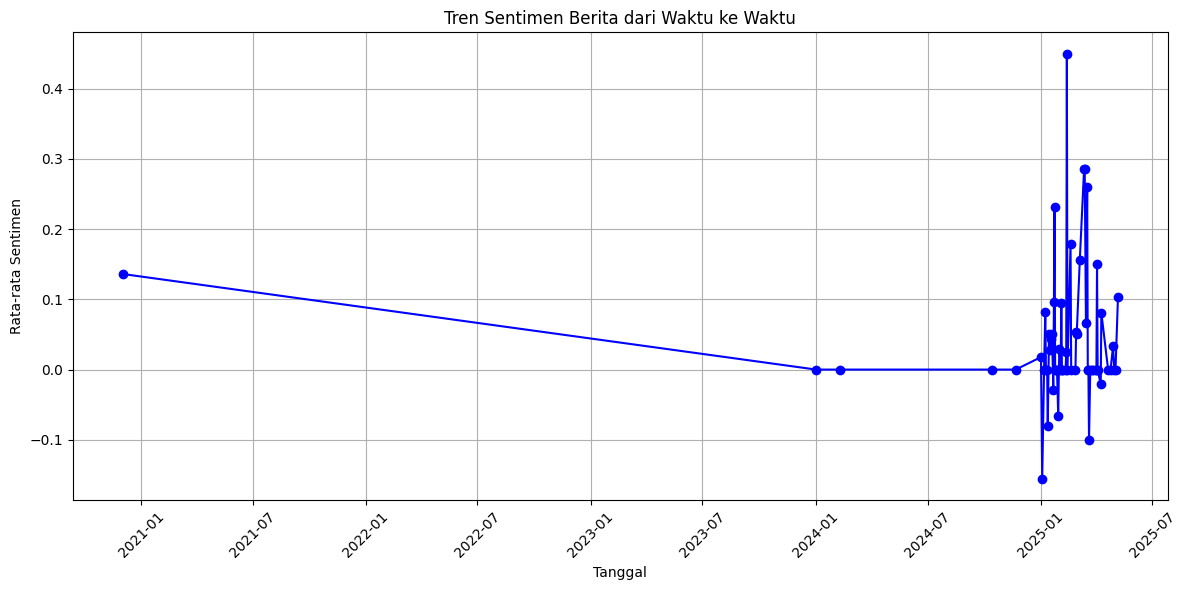

In [362]:
import pandas as pd
import matplotlib.pyplot as plt

# Pastikan kolom 'tanggal' dalam format datetime
df["date_final"] = pd.to_datetime(df["date_final"], errors="coerce")

# Hitung rata-rata sentimen berdasarkan tanggal
sentiment_trends = df.groupby('date_final')['sentiment_textblob'].mean()

# Tampilkan hasil tren sentimen
print(sentiment_trends)

# Visualisasi tren sentimen dengan line plot
plt.figure(figsize=(12, 6))
plt.plot(sentiment_trends.index, sentiment_trends.values, marker='o', linestyle='-', color='blue')
plt.title('Tren Sentimen Berita dari Waktu ke Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Rata-rata Sentimen')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

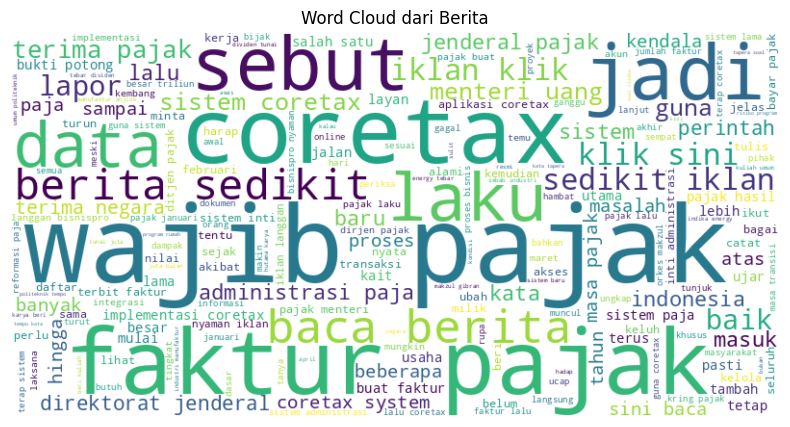

In [363]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Menggabungkan semua teks dari kolom 'clean_ready'
text_data = " ".join(df["clean_ready"].astype(str))

# Membuat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text_data)

# Visualisasi word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Matikan sumbu
plt.title('Word Cloud dari Berita')
plt.show()

In [364]:
print(doc_count_bow[0])

6


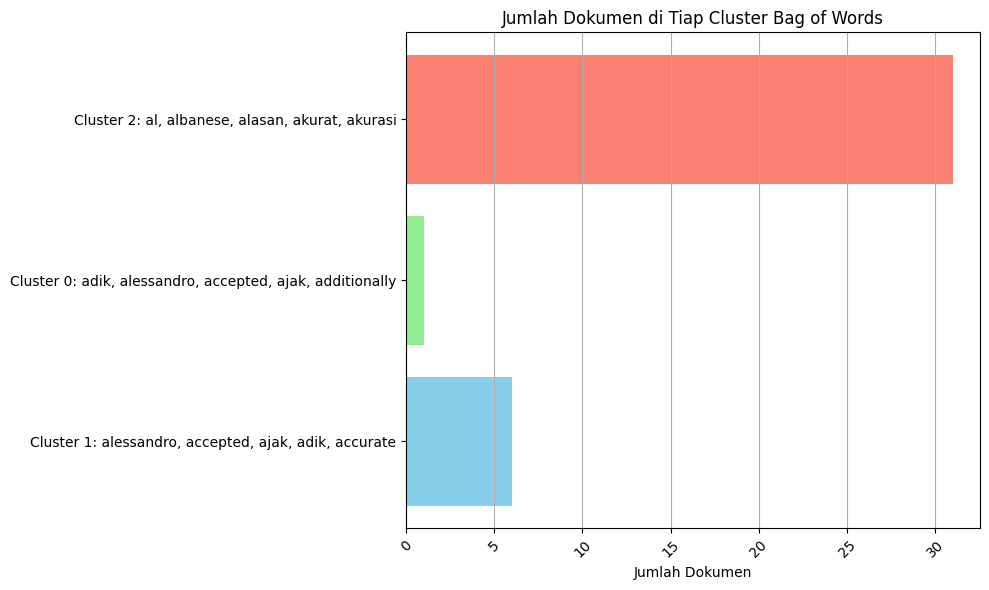

In [366]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Updated cluster labels based on your dataset
clusters = [
    "Cluster 1: alessandro, accepted, ajak, adik, accurate",
    "Cluster 0: adik, alessandro, accepted, ajak, additionally",
    "Cluster 2: al, albanese, alasan, akurat, akurasi",
]


# Jumlah dokumen per cluster dari hasil count_documents_per_cluster
doc_counts = [
    doc_count_bow[0],
    doc_count_bow[1],
    doc_count_bow[2],
]  # Pastikan untuk mendapatkan jumlah dari doc_count_bow

# Membuat bar plot
plt.figure(figsize=(10, 6))
plt.barh(clusters, doc_counts, color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Jumlah Dokumen')
plt.title('Jumlah Dokumen di Tiap Cluster Bag of Words')
plt.xticks(rotation=45)
plt.grid(axis='x')

# Tampilkan plot
plt.tight_layout()
plt.show()